<a href="https://colab.research.google.com/github/dfukagaw28/ColabNotebooks/blob/main/Colab%E3%81%A7GoogleSheets%E3%81%AB%E6%9B%B8%E3%81%8D%E8%BE%BC%E3%82%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab で Google Sheets に書き込む

## 解説


*   サンプルシートのまま実行すると，読み込みまで成功して書き込みで失敗するはず。
*   任意の Google Sheets を利用したい場合
    *   まず [Google Sheets](https://docs.google.com/spreadsheets/) で適当なシートを作成する。
    *   シートの URL は `https://docs.google.com/spreadsheets/d/XXXXXXXXX-XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX/edit?gid=0#gid=0` みたいになっているはず。
    *   `XXXX...XXXX` の部分が「シート ID」なので，この文字列をコピーしておく。
    *   「共有」によって権限の設定を行う。方針は主に2通り。
        *   「一般的なアクセス」を「制限付き」にして「アクセスするユーザー」にユーザー（またはグループ）を追加しておく。
        *   「一般的なアクセス」を「リンクを知っている全員」にしておく。
        *   デフォルトだと自分しかアクセスできない。
*   「すべてのセルと実行」すると，以下のような画面が順に表示されるはず。
    *   「このまま実行」「許可」「次へ」「続行」のように選択すればよいはず。

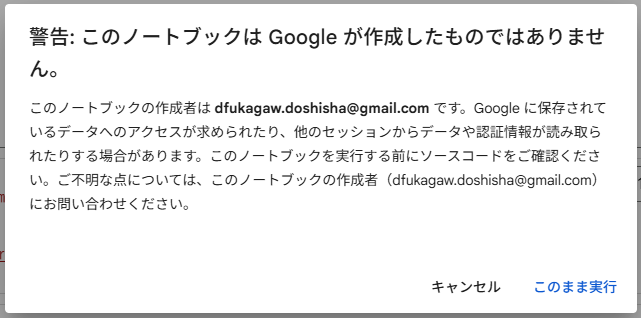

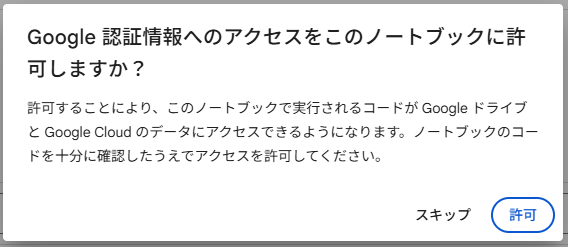

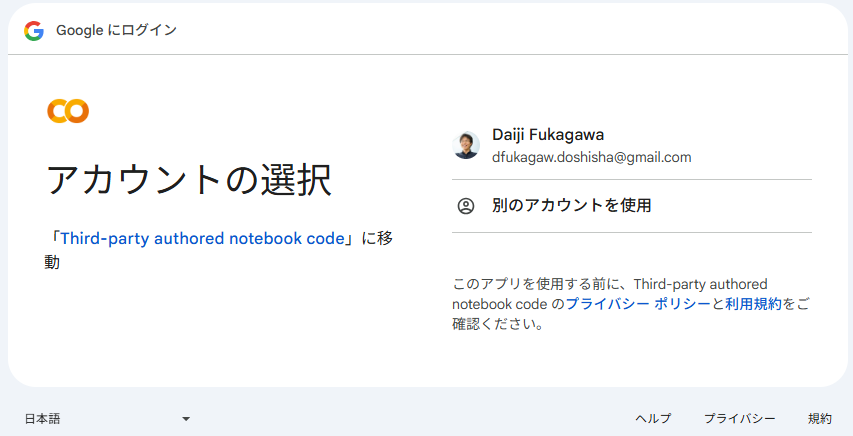

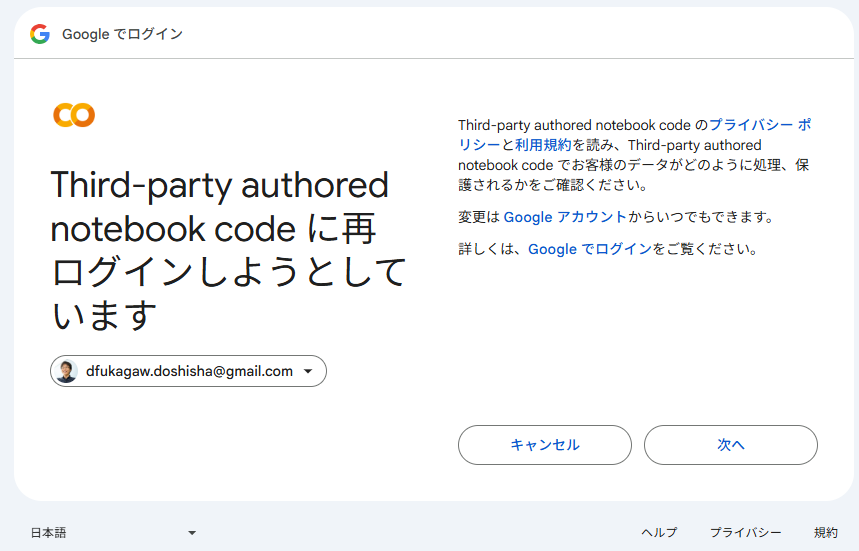

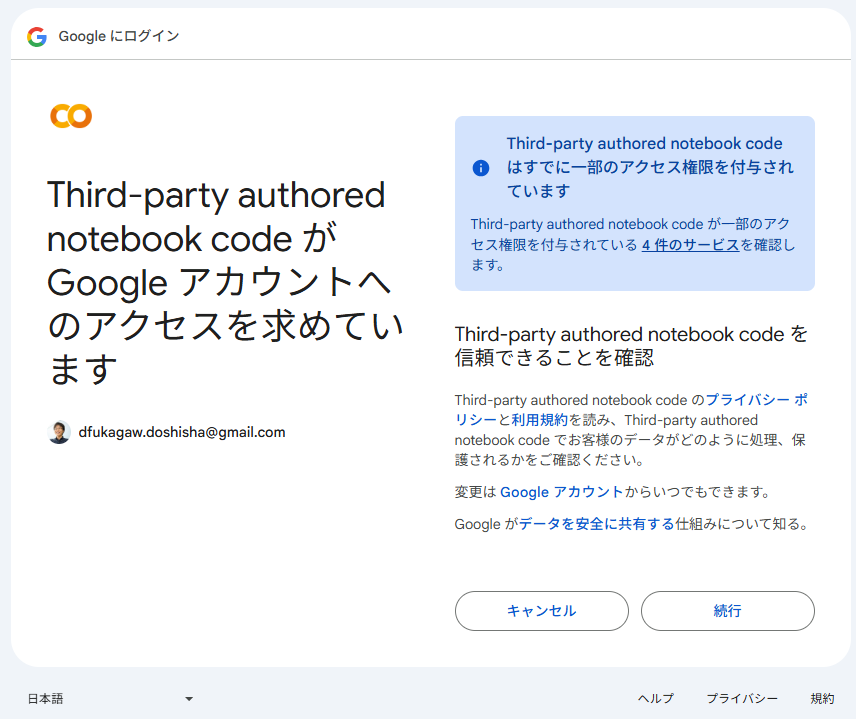

## スプレッドシートを開いて読み込む

*   以下を順に実行すればよい。
*   「すべてのセルを実行」でもよい。

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [2]:
# シートID
SHEET_ID = '1RX_ZOGujlagG3kXcKMKvBh3e3WC2aXnJjqXSBCoFRjI'  #@param {type:"string"}

# スプレッドシートのURLまたはタイトルで開く
spreadsheet_url = f"https://docs.google.com/spreadsheets/d/{SHEET_ID}/edit"
sh = gc.open_by_url(spreadsheet_url)

In [3]:
# ファイル（Excelでいうワークブック）の名前
sh.title

'untitled_sheet'

In [4]:
# ワークシート一覧
sh.worksheets()

[<Worksheet 'シート1' id:0>, <Worksheet 'A worksheet' id:10534729>]

In [5]:
# 0個目のワークシートのタイトル
sh.worksheets()[0].title

'シート1'

## スプレッドシートに書き込む

*   上記の[サンプルシート](https://docs.google.com/spreadsheets/d/1RX_ZOGujlagG3kXcKMKvBh3e3WC2aXnJjqXSBCoFRjI/edit)は「閲覧のみ可」の権限で共有しているため，以下は失敗する。
*   その他の使い方は[gspreadの公式ドキュメント](https://docs.gspread.org/)を参照。

In [6]:
# Creating a Worksheet
SHEET_NAME = "A worksheet"
try:
    worksheet = sh.add_worksheet(title=SHEET_NAME, rows=100, cols=20)
except:
    pass

worksheet = sh.worksheet(SHEET_NAME)

worksheet

<Worksheet 'A worksheet' id:10534729>

In [7]:
# Getting All Values From a Worksheet as a List of Lists
list_of_lists = worksheet.get_all_values()

list_of_lists

[['aaa', 'bbb'], ['123', '456']]

In [8]:
# Updating cells
worksheet.update([['aaa', 'bbb'], [123, 456]], 'A1:B2')

{'spreadsheetId': '1RX_ZOGujlagG3kXcKMKvBh3e3WC2aXnJjqXSBCoFRjI',
 'updatedRange': "'A worksheet'!A1:B2",
 'updatedRows': 2,
 'updatedColumns': 2,
 'updatedCells': 4}

In [9]:
# Getting All Values (again)
worksheet.get_all_values()

[['aaa', 'bbb'], ['123', '456']]

In [10]:
# Using gspread with pandas
import pandas as pd

dataframe = pd.DataFrame(worksheet.get_all_records())

dataframe

,aaa,bbb
0,123,456
